## Assignment

Try CNN on "Fruit" dataset. Also modify number of layers and observe the performance difference: 
https://www.kaggle.com/moltean/fruits

Or 

(In a case if you don't have that much dataPack available, download 20 images of apple and 20 images of orange from the internet and work on it with RANDOM state=Rollnumber stratergy, 80-20% training-testing division)

I have download the dataset from here --> https://www.kaggle.com/balraj98/apple2orange-dataset
This dataset is specifically for apple and orange only

References:
https://www.tensorflow.org/tutorials/load_data/images
https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory


In [9]:
from google.colab import files

In [10]:
files.upload()

Saving dataset.zip to dataset.zip


{'dataset.zip': b'PK\x03\x04\n\x00\x00\x00\x00\x007\\HS\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x08\x00\x00\x00dataset/PK\x03\x04\n\x00\x00\x00\x00\x007\\HS\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0e\x00\x00\x00dataset/apple/PK\x03\x04\x14\x00\x00\x00\x08\x00W\x08HS\xac\xe0\xd8y#\x0e\x00\x00\xbb\x0e\x00\x00 \x00\x00\x00dataset/apple/n07740461_3561.jpg\x95WgT\xd3\xdb\xb2\xff\xd3\x04T@\x12\xb0 \x82\xf4\x16@B\x17\x04E\xa9\xa1\x86\xa2\xb4\xa0\x12\xc0\x00\x81CS\xa2\x086\x10\xe9\x84\x00\x86\xa6R\x0c\x18\x8a\x04\x12\xa9*\x87N\x02\nJ\xef%t9\xf4&\x90\x87\xf7\xac\xe3}o\xbdu?\xdc\xd9\x1ff\xad\xf9\xad\x99=3{f\xef\xd9\x8c>\xc6\x18p\xc2\xc4\xc0\xd8\x00`bb\x02n\x1e.\x801\x08\\\x05\xb88\x8f\x1e;\xca\xc1u\xec\xe81nn.\x1e\xf0y~0\x08\x04\x96\x12\x14:u^AF\xe9\x82\x82\x8c<D\xf9\xa2\x89\x8e\xb2\x9a\x81:D\xfe\xf2\xf5+\x06\xa6\xe6pk8T\xc7\xe1\x96\x83\xe5M\x13+\xb8\xc5/#L\xdc\xdc\xdc`^\xb0$?\xbf\xa4\x85\xaa\xbc\xaa\xc5\x7fM\x8c\xcf\x00/\x07\x13\xc0\x04\xb00\x89\x02\xcc\xbcL,\xbcL\x8c\x06@\xf0P

In [12]:
! unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/
   creating: dataset/apple/
  inflating: dataset/apple/n07740461_3561.jpg  
  inflating: dataset/apple/n07740461_612.jpg  
  inflating: dataset/apple/n07740461_614.jpg  
  inflating: dataset/apple/n07740461_656.jpg  
  inflating: dataset/apple/n07740461_663.jpg  
  inflating: dataset/apple/n07740461_664.jpg  
  inflating: dataset/apple/n07740461_666.jpg  
  inflating: dataset/apple/n07740461_679.jpg  
  inflating: dataset/apple/n07740461_708.jpg  
  inflating: dataset/apple/n07740461_738.jpg  
  inflating: dataset/apple/n07740461_763.jpg  
  inflating: dataset/apple/n07740461_782.jpg  
  inflating: dataset/apple/n07740461_784.jpg  
  inflating: dataset/apple/n07740461_785.jpg  
  inflating: dataset/apple/n07740461_787.jpg  
  inflating: dataset/apple/n07740461_794.jpg  
  inflating: dataset/apple/n07740461_802.jpg  
  inflating: dataset/apple/n07740461_803.jpg  
  inflating: dataset/apple/n07740461_818.jpg  
  inflating: dataset/apple/n077404

In [13]:
# Import all the libraries here
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# For image handling
import os
import PIL
import PIL.Image
import tensorflow as tf

import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader

from sklearn.model_selection import train_test_split

In [14]:
# Path for dataset
data_dir = 'dataset/'

In [15]:
# Parameters
batch_size = 10
img_height = 256
img_width = 256

In [16]:
print(tf.__version__)

2.6.0


In [17]:
# Load the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
              data_dir,
              validation_split=0.2,
              subset="training",
              seed=138,
              image_size=(img_height, img_width),
              batch_size=batch_size
            )

Found 40 files belonging to 2 classes.
Using 32 files for training.


In [18]:
val_ds = tf.keras.utils.image_dataset_from_directory(
            data_dir,
            validation_split=0.2,
            subset="validation",
            seed=138,
            image_size=(img_height, img_width),
            batch_size=batch_size
         )

Found 40 files belonging to 2 classes.
Using 8 files for validation.


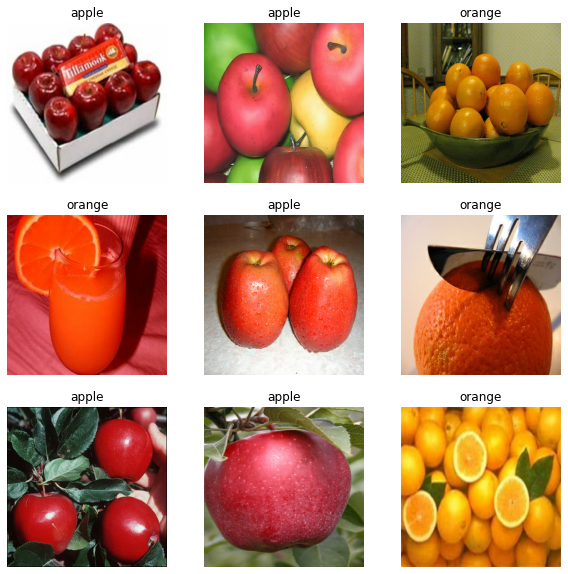

In [19]:
# Visualize the data
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [20]:
class_names = train_ds.class_names
print(class_names)

['apple', 'orange']


In [21]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(10, 256, 256, 3)
(10,)


In [22]:
# Standardize the data
# The RGB channel values are in the [0, 255] range. This is not ideal for a neural network; 
# in general you should seek to make your input values small.
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [23]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [24]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [25]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [26]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [27]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
4/4 [==============================] - 4s 618ms/step - loss: 0.7949 - accuracy: 0.5312 - val_loss: 1.8325 - val_accuracy: 0.3750
Epoch 2/10
4/4 [==============================] - 2s 564ms/step - loss: 0.7346 - accuracy: 0.7812 - val_loss: 0.4746 - val_accuracy: 0.8750
Epoch 3/10
4/4 [==============================] - 2s 558ms/step - loss: 0.3356 - accuracy: 0.8438 - val_loss: 0.4138 - val_accuracy: 0.8750
Epoch 4/10
4/4 [==============================] - 2s 562ms/step - loss: 0.2276 - accuracy: 0.9062 - val_loss: 0.2674 - val_accuracy: 0.8750
Epoch 5/10
4/4 [==============================] - 2s 562ms/step - loss: 0.0915 - accuracy: 0.9688 - val_loss: 0.1376 - val_accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 2s 561ms/step - loss: 0.0974 - accuracy: 0.9688 - val_loss: 0.3492 - val_accuracy: 0.7500
Epoch 7/10
4/4 [==============================] - 2s 572ms/step - loss: 0.0781 - accuracy: 0.9688 - val_loss: 0.0673 - val_accuracy: 1.0000
Epoch 8/10
4/4 [====